In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
#import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.utils import shuffle


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [4]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [5]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [6]:
df['person_home_ownership'].mode()

0    RENT
Name: person_home_ownership, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
df['person_gender']=df['person_gender'].map({"female":0 ,"male":1})
df['person_education']=df['person_education'].map({"High School":0 ,"Bachelor":1 , 'Master':2 , 'Associate':3 , 'Doctorate':4})
df['person_home_ownership']=df['person_home_ownership'].map({"MORTGAGE":0 ,"RENT":1 , 'OWN':2 , 'OTHER':3})
df['loan_intent']=df['loan_intent'].map({"PERSONAL":0 ,"EDUCATION":1 , 'MEDICAL':2 , 'VENTURE':3 , 'HOMEIMPROVEMENT':4 , 'DEBTCONSOLIDATION':5})
df['previous_loan_defaults_on_file']=df['previous_loan_defaults_on_file'].map({"No":0 ,"Yes":1})

df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,2,71948.0,0,1,35000.0,0,16.02,0.49,3.0,561,0,1
1,21.0,0,0,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,0,12438.0,3,0,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,1,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,1,2,66135.0,1,1,35000.0,2,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,3,47971.0,6,1,15000.0,2,15.66,0.31,3.0,645,0,1
44996,37.0,0,3,65800.0,17,1,9000.0,4,14.07,0.14,11.0,621,0,1
44997,33.0,1,3,56942.0,7,1,2771.0,5,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,1,12000.0,1,13.23,0.36,6.0,604,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [10]:
df.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,0.552022,1.465044,8.031905e+04,5.410333,0.659911,9583.157556,2.323622,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,0.497292,1.182487,8.042250e+04,6.063532,0.609255,6314.886691,1.672702,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,0.000000,0.000000,8.000000e+03,0.000000,0.000000,500.000000,0.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,4.720400e+04,1.000000,0.000000,5000.000000,1.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,1.000000,1.000000,6.704800e+04,4.000000,1.000000,8000.000000,2.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,9.578925e+04,8.000000,1.000000,12237.250000,4.000000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,1.000000,4.000000,7.200766e+06,125.000000,3.000000,35000.000000,5.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


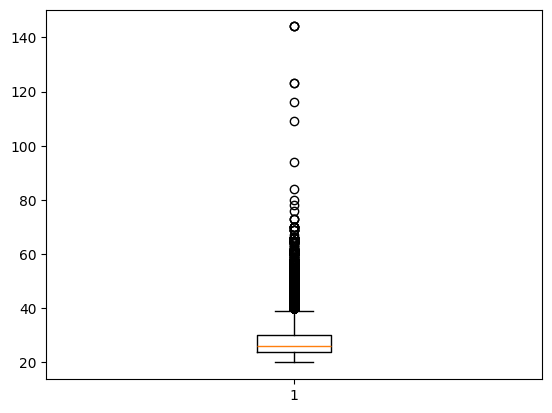

In [11]:
fig = plt.boxplot( df['person_age'])

In [12]:
Q1 = df['person_age'].quantile(0.25)
Q3 = df['person_age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['person_age'] = np.where(df['person_age'] < lower, lower, df["person_age"])
df['person_age'] = np.where(df['person_age'] > upper, upper, df["person_age"])
#clip
#colum.clip(df, lower, upper)

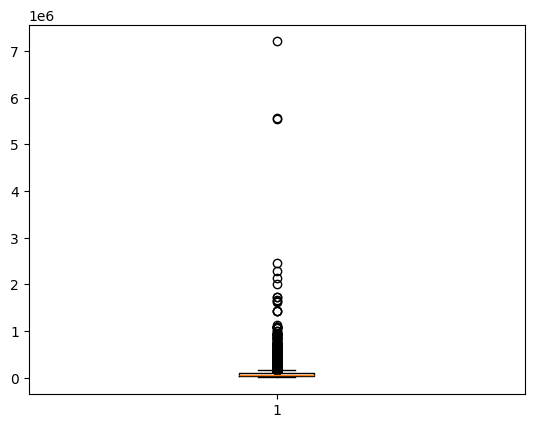

In [13]:
fig = plt.boxplot( df['person_income'])

In [14]:
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['person_income'] = np.where(df['person_income'] < lower, lower, df["person_income"])
df['person_income'] = np.where(df['person_income'] > upper, upper, df["person_income"])

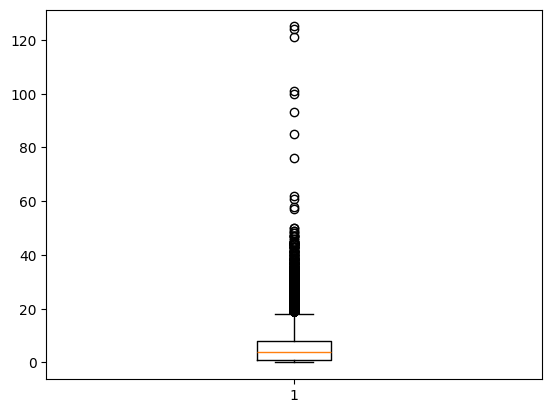

In [15]:
fig = plt.boxplot( df['person_emp_exp'])

In [16]:
Q1 = df['person_emp_exp'].quantile(0.25)
Q3 = df['person_emp_exp'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['person_emp_exp'] = np.where(df['person_emp_exp'] < lower, lower, df["person_emp_exp"])
df['person_emp_exp'] = np.where(df['person_emp_exp'] > upper, upper, df["person_emp_exp"])

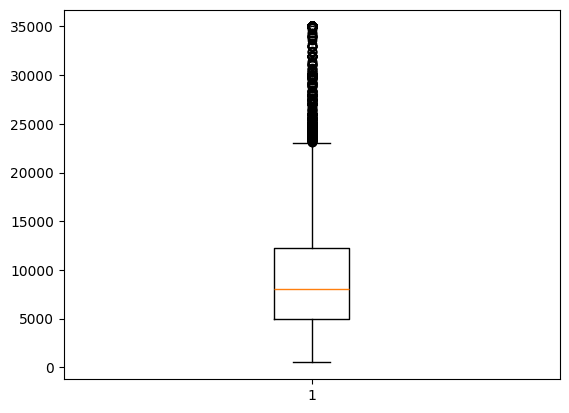

In [17]:
fig = plt.boxplot( df['loan_amnt'])

In [18]:
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['loan_amnt'] = np.where(df['loan_amnt'] < lower, lower, df["loan_amnt"])
df['loan_amnt'] = np.where(df['loan_amnt'] > upper, upper, df["loan_amnt"])

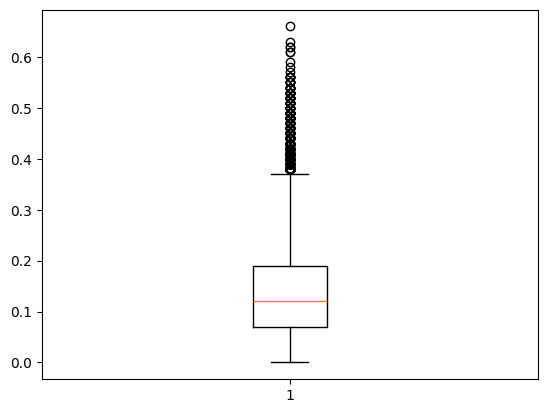

In [19]:
fig = plt.boxplot( df['loan_percent_income'])

In [20]:
Q1 = df['loan_percent_income'].quantile(0.25)
Q3 = df['loan_percent_income'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['loan_percent_income'] = np.where(df['loan_percent_income'] < lower, lower, df["loan_percent_income"])
df['loan_percent_income'] = np.where(df['loan_percent_income'] > upper, upper, df["loan_percent_income"])

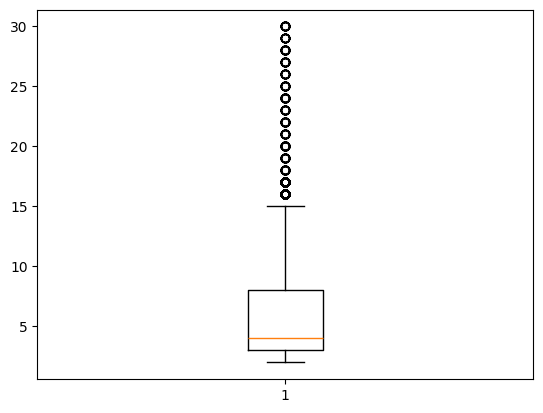

In [21]:
fig = plt.boxplot( df['cb_person_cred_hist_length'])

In [22]:
Q1 = df['cb_person_cred_hist_length'].quantile(0.25)
Q3 = df['cb_person_cred_hist_length'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['cb_person_cred_hist_length'] = np.where(df['cb_person_cred_hist_length'] < lower, lower, df["cb_person_cred_hist_length"])
df['cb_person_cred_hist_length'] = np.where(df['cb_person_cred_hist_length'] > upper, upper, df["cb_person_cred_hist_length"])

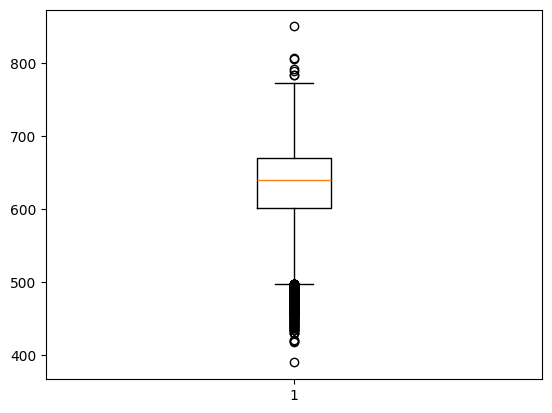

In [23]:
fig = plt.boxplot( df['credit_score'])

In [24]:
Q1 = df['credit_score'].quantile(0.25)
Q3 = df['credit_score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df['credit_score'] = np.where(df['credit_score'] < lower, lower, df["credit_score"])
df['credit_score'] = np.where(df['credit_score'] > upper, upper, df["credit_score"])

In [25]:
df.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.00000,45000.000000,45000.000000
mean,27.444733,0.552022,1.465044,75677.400428,5.170311,0.659911,9411.042900,2.323622,11.006606,0.138842,5.783711,632.80830,0.507956,0.222222
std,4.930055,0.497292,1.182487,38071.779506,5.137068,0.609255,5832.950765,1.672702,2.978808,0.084360,3.578787,49.80135,0.499942,0.415744
min,20.000000,0.000000,0.000000,8000.000000,0.000000,0.000000,500.000000,0.000000,5.420000,0.000000,2.000000,497.50000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,47204.000000,1.000000,0.000000,5000.000000,1.000000,8.590000,0.070000,3.000000,601.00000,0.000000,0.000000
50%,26.000000,1.000000,1.000000,67048.000000,4.000000,1.000000,8000.000000,2.000000,11.010000,0.120000,4.000000,640.00000,1.000000,0.000000
75%,30.000000,1.000000,3.000000,95789.250000,8.000000,1.000000,12237.250000,4.000000,12.990000,0.190000,8.000000,670.00000,1.000000,0.000000
max,39.000000,1.000000,4.000000,168667.125000,18.500000,3.000000,23093.125000,5.000000,20.000000,0.370000,15.500000,773.50000,1.000000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  float64
 5   person_home_ownership           45000 non-null  int64  
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  int64  
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  float64
 12  previous_loan_defaults_on_file  

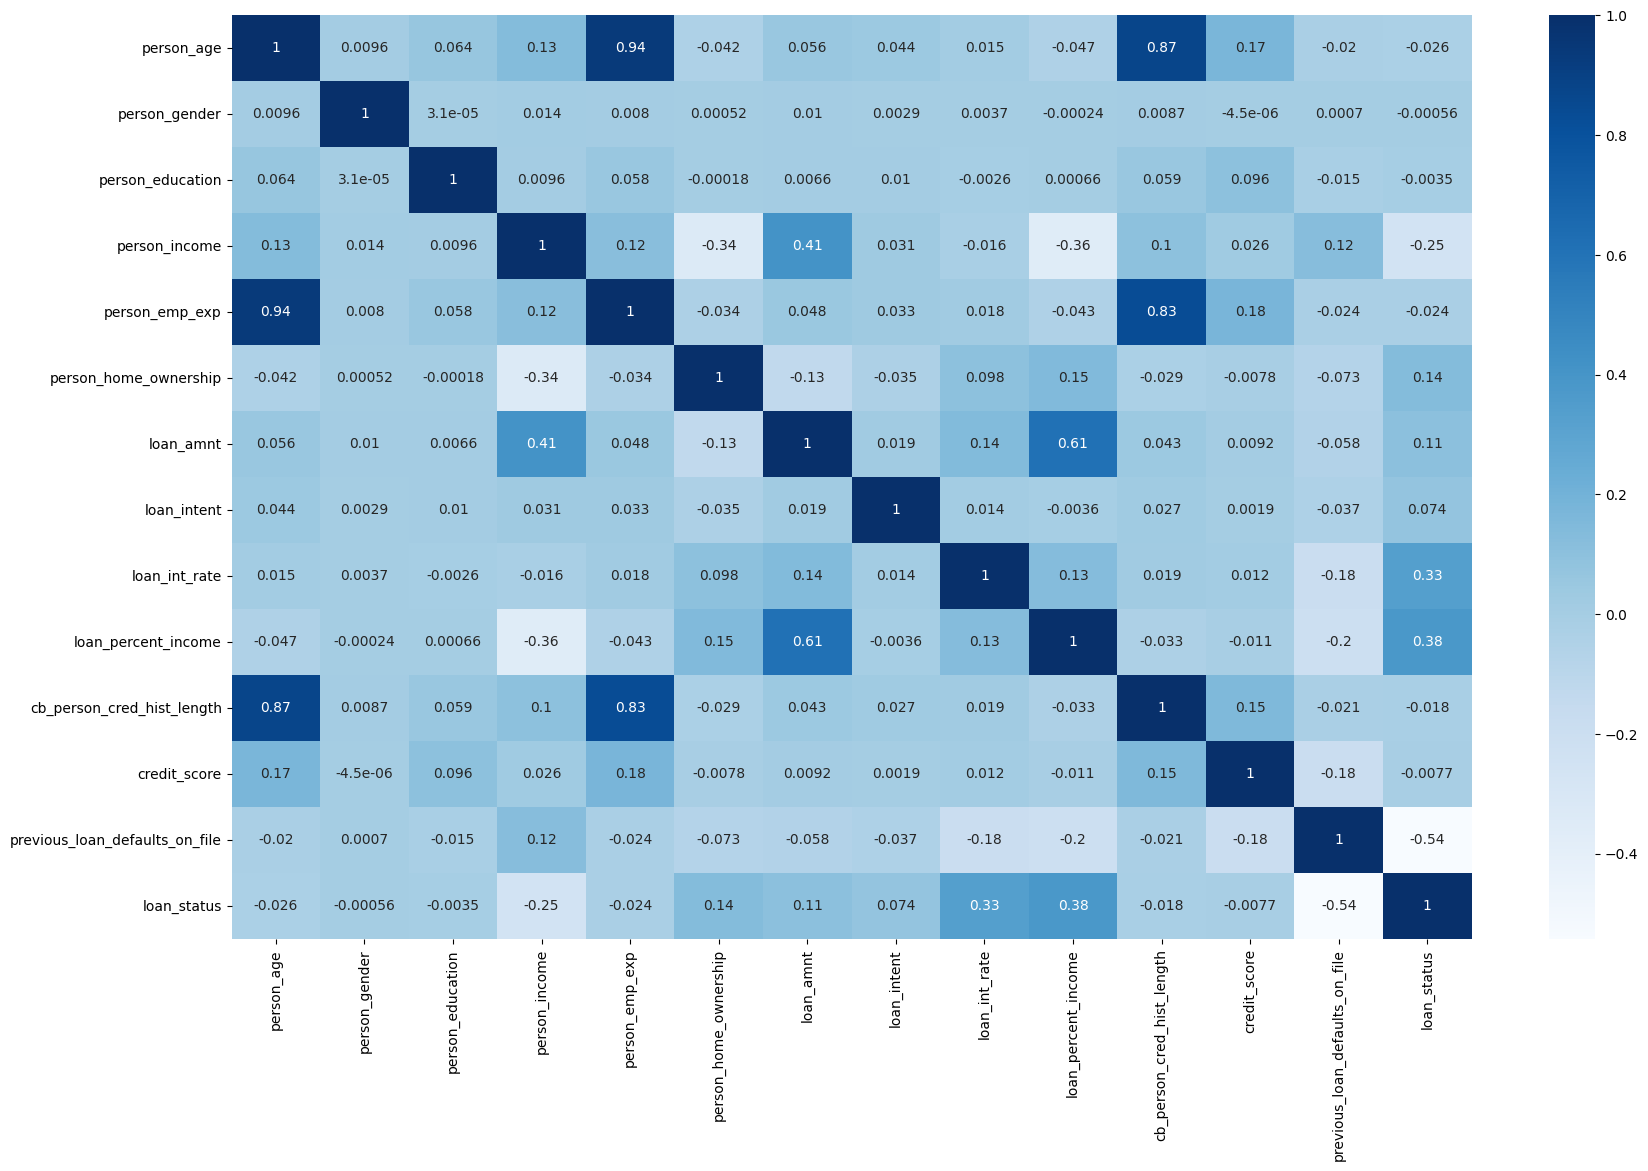

In [27]:
correlation_matrix =df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix , annot= True , cmap='Blues')
plt.show()

In [28]:
threshold = 0.01
correlation_matrix = df.corr()
high_corr_feature = correlation_matrix.index[abs(correlation_matrix['loan_status'])>threshold].tolist()
high_corr_feature.remove('loan_status')

print('selected features based on correlation with target:')
print(high_corr_feature)


X_selected = df[high_corr_feature]
y = df['loan_status']

selected features based on correlation with target:
['person_age', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'previous_loan_defaults_on_file']


In [29]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X_selected)

In [30]:
x_train , x_test , y_train , y_test = train_test_split(X,y ,train_size=0.8,shuffle=True,random_state=40)

In [31]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [32]:
x_train.shape


(36000, 10)

Bagging and Boosting

In [33]:


from catboost import Pool

X = df.drop('loan_status', axis=1)
y = df.loan_status

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=123, stratify=y_train)

train_pool = Pool(X_train, y_train, cat_features=categorical_cols.values)

val_pool = Pool(X_val, y_val, cat_features=categorical_cols.values)

test_pool = Pool(X_test, y_test, cat_features=categorical_cols.values)

In [ ]:
import optuna
from optuna import create_study
from optuna.samplers import TPESampler
from catboost import CatBoostClassifier, Pool
from catboost.utils import eval_metric

def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
        'iterations': 400,  # Fix number of iterations
        'random_seed': 42,  # Fix random seed
        'task_type': 'CPU',  # Use GPU for faster training
        'verbose': 0,  # Suppress verbose output
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),  # Bagging types
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  # Proportion of data to use for each tree
    }

    # Create the CatBoost model with the trial's parameters
    model = CatBoostClassifier(**params)
    
    # Fit the model using the training pool and validate on the validation pool
    model.fit(train_pool, eval_set=val_pool, use_best_model=True)
    
    # Predict the probability of the positive class on validation data
    y_pred = model.predict_proba(val_pool)[:, 1]  # get the probabilities for the positive class
    
    
    # Evaluate the AUC metric on the validation set
    return eval_metric(val_pool.get_label(), y_pred, 'AUC')



# Create a sampler and study for hyperparameter optimization
sampler = TPESampler(seed=123)
study = create_study(direction='maximize', sampler=sampler)

# Optimize the objective function for 5 trials
study.optimize(objective, n_trials=5)

# Visualize the optimization history
optuna.visualization.plot_optimization_history(study)

# 1. Plot CatBoost Feature Importance
model.plot_feature_importance()
plt.show()

# 2. Plot CatBoost Learning Curve
model.plot_metrics()
plt.show()

# 3. Plot Optuna Optimization History
fig = vis.plot_optimization_history(study)
fig.show()

# 4. Plot Optuna Parameter Importances
fig = vis.plot_param_importances(study)
fig.show()



[I 2024-12-10 17:00:40,439] A new study created in memory with name: no-name-d444154e-7edb-4600-a93c-04c0567d09aa
[W 2024-12-10 17:00:43,055] Trial 0 failed with parameters: {'learning_rate': 0.07268222670380756, 'depth': 5, 'l2_leaf_reg': 3.041663082077828, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.7404659507421805} because of the following error: AttributeError("'CatBoostClassifier' object has no attribute 'plot_feature_importance'").
Traceback (most recent call last):
  File "/Users/indraniborra/.pyenv/versions/3.9.6/lib/python3.9/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/w8/_c74tplx26q91cmt17qdmvg80000gn/T/ipykernel_50629/2013293687.py", line 32, in objective
    model.plot_feature_importance()
AttributeError: 'CatBoostClassifier' object has no attribute 'plot_feature_importance'
[W 2024-12-10 17:00:43,056] Trial 0 failed with value None.


AttributeError: 'CatBoostClassifier' object has no attribute 'plot_feature_importance'

In [ ]:
# Run the optimization
study.optimize(objective, n_trials=5)

# 1. Plot CatBoost Feature Importance
model.plot_feature_importance()
plt.show()

# 2. Plot CatBoost Learning Curve
model.plot_metrics()
plt.show()

# 3. Plot Optuna Optimization History
fig = vis.plot_optimization_history(study)
fig.show()

# 4. Plot Optuna Parameter Importances
fig = vis.plot_param_importances(study)
fig.show()


NameError: name 'model' is not defined

Bagging: Experiment with subsample and bootstrap_type

In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Example pools (replace with your data)
train_pool = Pool(X_train, y_train, cat_features=categorical_cols)
val_pool = Pool(X_val, y_val, cat_features=categorical_cols)

# Bagging configurations
subsample_values = np.linspace(0.5, 1.0, 6)  # 0.5 to 1.0
bootstrap_types = ['Bayesian', 'Bernoulli', 'MVS']

results = []

# Loop over bagging configurations
for subsample in subsample_values:
    for bootstrap_type in bootstrap_types:
        # Train model
        model = CatBoostClassifier(
            iterations=200,
            learning_rate=0.05,
            depth=6,
            bootstrap_type=bootstrap_type,
            subsample=subsample,
            random_seed=42,
            verbose=0
        )
        model.fit(train_pool, eval_set=val_pool)
        
        # Predict and compute AUC
        y_pred = model.predict_proba(val_pool)[:, 1]
        auc = roc_auc_score(val_pool.get_label(), y_pred)
        
        # Store results
        results.append((bootstrap_type, subsample, auc))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Bootstrap Type', 'Subsample', 'AUC'])

# Plot results
plt.figure(figsize=(10, 6))
for bootstrap_type in bootstrap_types:
    subset = results_df[results_df['Bootstrap Type'] == bootstrap_type]
    plt.plot(subset['Subsample'], subset['AUC'], label=bootstrap_type, marker='o')

plt.xlabel('Subsample')
plt.ylabel('AUC')
plt.title('Effect of Bagging on Model Performance (AUC)')
plt.legend(title='Bootstrap Type')
plt.grid()
plt.show()


Boosting: Experiment with boosting_type and Track Learning Curve


In [42]:
# Boosting configurations
boosting_types = ['Ordered', 'Plain']

plt.figure(figsize=(10, 6))

for boosting_type in boosting_types:
    # Train model
    model = CatBoostClassifier(
        iterations=200,
        learning_rate=0.05,
        depth=6,
        boosting_type=boosting_type,
        random_seed=42,
        verbose=0
    )
    model.fit(train_pool, eval_set=val_pool, plot=False)  # Disable default plot
    
    # Get learning curve
    metrics = model.get_evals_result()
    auc_values = metrics['validation']['AUC']  # Replace with 'Logloss' or another metric if needed
    
    # Plot learning curve
    plt.plot(range(1, len(auc_values) + 1), auc_values, label=boosting_type, marker='o')

plt.xlabel('Iteration')
plt.ylabel('AUC')
plt.title('Learning Curve: Effect of Boosting Type on AUC')
plt.legend(title='Boosting Type')
plt.grid()
plt.show()


KeyError: 'AUC'

<Figure size 1000x600 with 0 Axes>

  Using cached xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl (1.9 MB)
Note: you may need to restart the kernel to use updated packages.
Bagging Model Metrics:
Accuracy: 0.9294444444444444
ROC AUC: 0.9718530714285716
[[6796  204]
 [ 431 1569]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.88      0.78      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000


Boosting Model (XGBoost) Metrics:
Accuracy: 0.9327777777777778
ROC AUC: 0.9767807857142856
[[6823  177]
 [ 428 1572]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.90      0.79      0.84      2000

    accuracy                           0.93      9000
   macro avg      

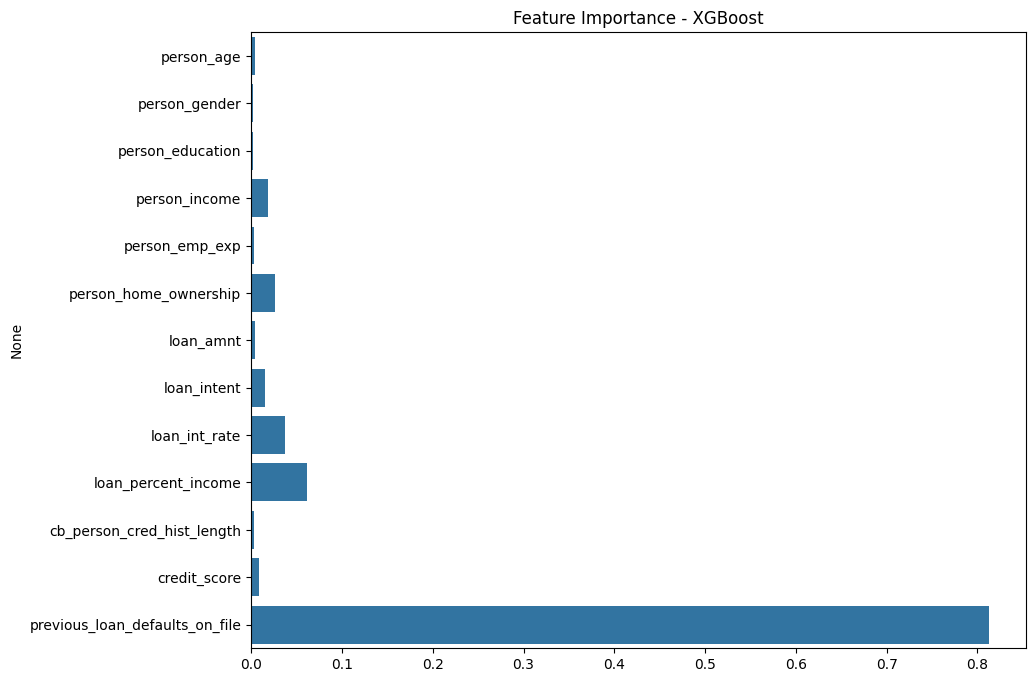

XGBoostError: No evaluation result, `eval_set` is not used during training.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace with the actual path or DataFrame object)
# Assuming your dataset is named `df`
# df = pd.read_csv('path_to_your_dataset.csv')

# Prepare the dataset
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Bagging Classifier
bagging_model = BaggingClassifier(n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)

# Boosting Classifier (XGBoost)
xgboost_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_boosting = xgboost_model.predict(X_test)
y_pred_proba_boosting = xgboost_model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Bagging Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("ROC AUC:", roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:, 1]))
print(confusion_matrix(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))

print("\nBoosting Model (XGBoost) Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_boosting))
print(confusion_matrix(y_test, y_pred_boosting))
print(classification_report(y_test, y_pred_boosting))

# Visualization
# Feature Importance (XGBoost)
plt.figure(figsize=(10, 8))
importance = xgboost_model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.title("Feature Importance - XGBoost")
plt.show()

# Learning Curve (XGBoost)
results = xgboost_model.evals_result()
plt.plot(results['validation_0']['error'], label='Train Error')
plt.plot(results['validation_1']['error'], label='Test Error')
plt.title('Learning Curve - XGBoost')
plt.xlabel('Boosting Rounds')
plt.ylabel('Error')
plt.legend()
plt.show()

# Confusion Matrix Heatmap for Bagging
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Bagging")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix Heatmap for Boosting
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_boosting), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
